### 문제 1: 데이터 로드 및 탐색

- **데이터의 첫 5개 행을 출력**하여 데이터 형식을 확인하세요.
- **데이터프레임의 컬럼 정보**와 **결측치 여부**를 확인하고 전처리 전략을 고민해보세요.

In [4]:
import pandas as pd

# 파일 읽기
excel_file = pd.ExcelFile('../data/통계 MQ1/online_retail_II.xlsx')

# 각각의 시트 읽기
df1 = pd.read_excel(excel_file, sheet_name='Year 2009-2010') # 첫 번째 시트
df2 = pd.read_excel(excel_file, sheet_name='Year 2010-2011') # 두 번째 시트

# 데이터 합치기
df = pd.concat([df1, df2], ignore_index=True)
df



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# InvoiceNo가 Invoice로 되어있어 혼선 방지를 위해 컬럼 이름 변경
df.rename(columns={'Invoice': 'InvoiceNo'}, inplace=True)
df.head()      #기본이 5개

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
# 데이터프레임의 컬럼 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   InvoiceNo    1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [7]:
# 결측치 여부 확인
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

### 문제 2: 데이터 전처리

- **`InvoiceDate`** 컬럼을 날짜 형식으로 변환하고, **`Customer ID`**에 결측치가 있는 행을 제거하세요.
- **`Customer ID`**를 정수형으로 변환한 후, **`InvoiceDate`**를 기준으로 데이터를 정렬하세요.
- 금액을 나타내는 새로운 컬럼 **`Total`** 을 생성하세요 (`Quantity`와 `Price`를 곱한 값).

In [8]:
# InvoiceDate 컬럼을 날짜 형식으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Customer ID에 결측치가 있는 행을 제거
df = df.dropna(subset=['Customer ID'])

# 결측치만큼 행 개수 줄어드는지 확인
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [36]:
# 결측치 0개인지 재확인
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Total          0
YearMonth      0
dtype: int64

In [37]:
# Customer ID를 정수형으로 변환
df['Customer ID'] = df['Customer ID'].astype(int)

# InvoiceDate 기준 오름차순 정렬
df.sort_values(by='InvoiceDate', inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_13764\3354259714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer ID'] = df['Customer ID'].astype(int)
C:\Users\USER\AppData\Local\Temp\ipykernel_13764\3354259714.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='InvoiceDate', inplace=True)


In [38]:
# 금액 컬럼 생성 및 확인
df['Total'] = df['Quantity'] * df['Price']

# 생성 됐는지 확인
df

C:\Users\USER\AppData\Local\Temp\ipykernel_13764\1729066939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total'] = df['Quantity'] * df['Price']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,YearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009-12
...,...,...,...,...,...,...,...,...,...,...
1067356,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011-12
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12
1067362,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680,France,15.60,2011-12
1067355,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680,France,23.40,2011-12


### 문제 3: 나라별 구매 인원 시각화

- **`Country`** 컬럼을 기준으로 **`Customer ID`**의 유니크한 값을 계산하여 나라별 구매 고객 수를 시각화 해보세요

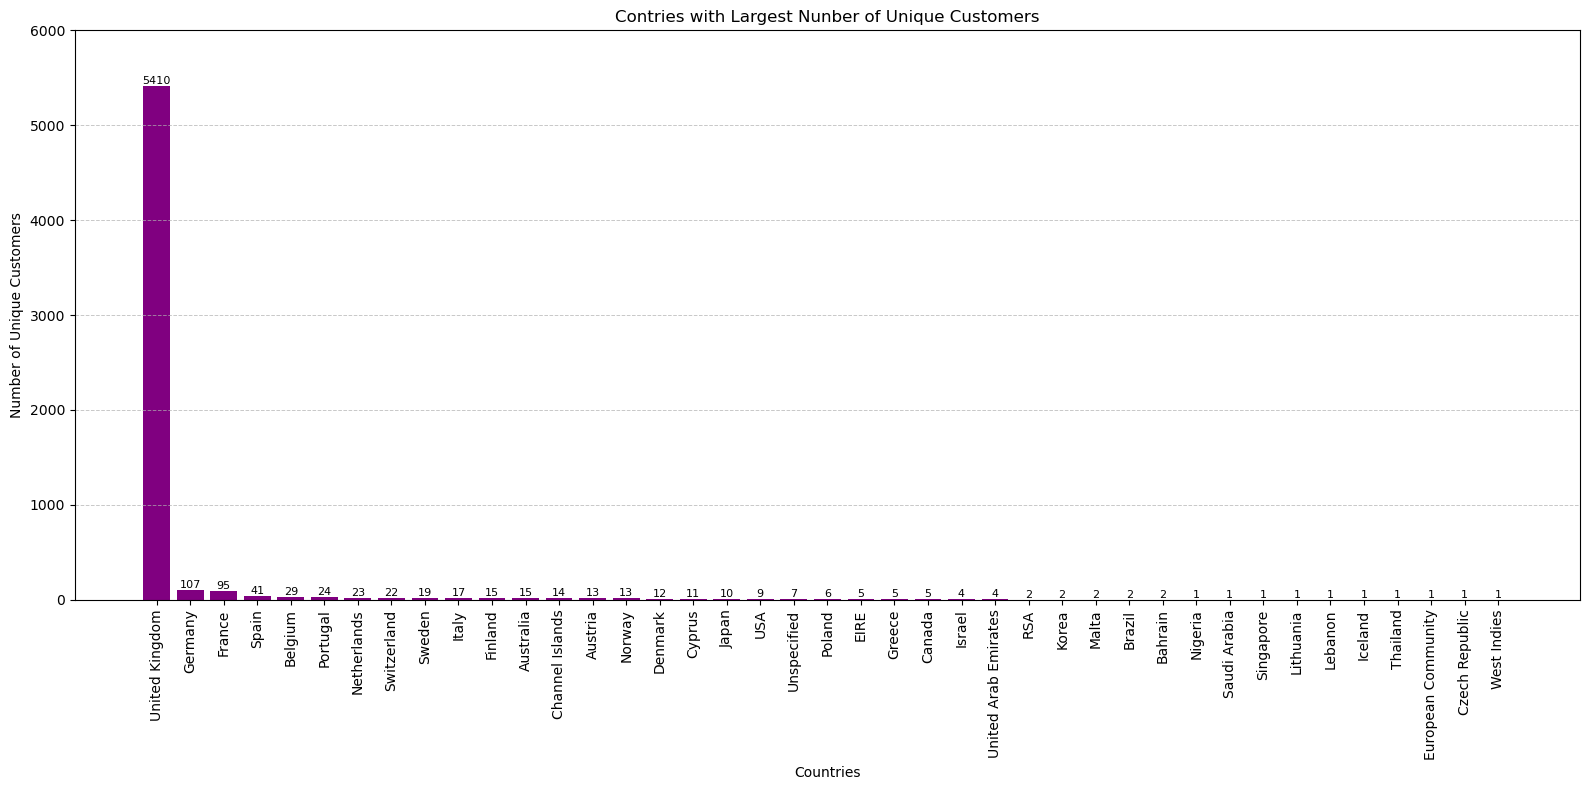

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Country 컬럼을 기준으로 Customer ID의 유니크한 값 계산
country_customer_counts = df.groupby('Country')['Customer ID'].nunique()

# 내림차순 정렬 (보기 좋게)
country_customer_counts = country_customer_counts.sort_values(ascending=False)

 
# 시각화
plt.figure(figsize=(16,8))
plt.ylim(0, 6000)
bars = plt.bar(country_customer_counts.index, country_customer_counts.values, color= 'purple')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# 수치(label) 추가
for bar in bars:
    height = bar.get_height() # bar의 높이 측정 -> figsize 기준준
    plt.text(bar.get_x() + bar.get_width()/2, height,   # x, y 위치
             f'{int(height)}',                         # 텍스트 (정수로 표시)
             ha='center', va='bottom', fontsize=8)      # 중앙정렬, 약간 위로
    
plt.xticks(rotation=90)  # x축 국가명 회전 (45도로 하면서 글씨가 안 겹치게 하려면 tight_layout을 써도 겹쳐서 figsize가 너무 커져야 해서 조정)
plt.title('Contries with Largest Nunber of Unique Customers')
plt.xlabel('Countries')
plt.ylabel('Number of Unique Customers')

plt.tight_layout()
plt.show()


### 문제 4: Acquisition (고객 유입 분석)

- 신규 고객 분석을 위해 고객의 **첫 구매 시점**을 기준으로 월별 신규 유입 고객 수를 계산하세요.
- 각 고객의 첫 구매 날짜를 추출하고, **월별 신규 고객 수**를 시각화하세요.

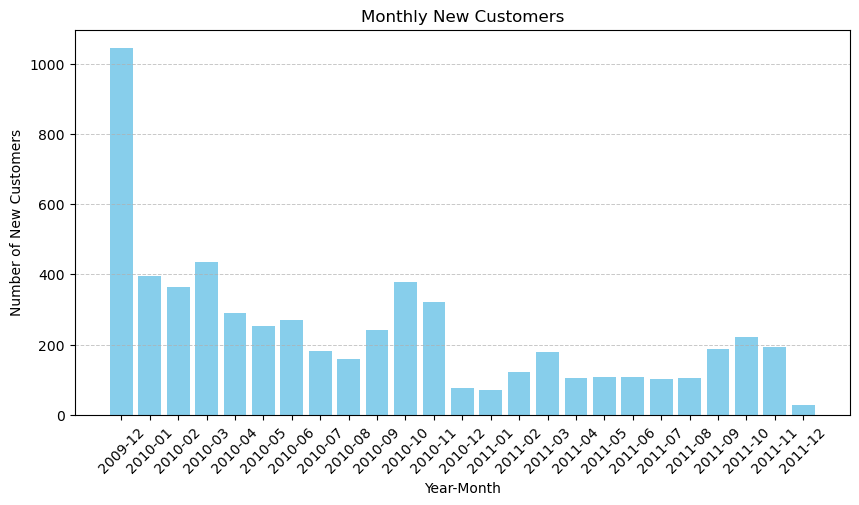

In [40]:
# 고객별 첫 구매일 계산
first_purchase = (
    df
    .groupby('Customer ID')['InvoiceDate']
    .min()                                 # 고객별 가장 이른 날짜(최솟값)
    .reset_index(name='FirstPurchaseDate')
)

# 월 단위로 변환
first_purchase['FirstPurchaseMonth'] = (
    first_purchase['FirstPurchaseDate']
    .dt.to_period('M')                    # YYYY-MM 형태의 Period
    .dt.to_timestamp()                    # 다시 Timestamp로 변환 (혹시 모르니)
)

monthly_new = (
    first_purchase
    .groupby('FirstPurchaseMonth')['Customer ID']
    .nunique()
    .sort_index()
)

# 시각화
plt.figure(figsize=(10,5))
# x축 레이블로 'YYYY-MM' 문자열 리스트 생성(컴프리헨션 이용)
labels = [ts.strftime('%Y-%m') for ts in monthly_new.index]
# 막대그래프
plt.bar(labels, monthly_new.values, color = 'skyblue')
plt.grid(axis= 'y', linestyle= '--', linewidth= 0.7, alpha= 0.7)
plt.xticks(rotation=45)
plt.title('Monthly New Customers')
plt.xlabel('Year-Month')
plt.ylabel('Number of New Customers')
plt.show()

### **문제 5: Activation (고객 활성화 분석)**

- 모든 고객 중 첫 구매 이후 **총 구매 금액이 특정 기준 금액 (£50)** 이상인 고객을 활성화된 고객으로 정의합니다.
- 전체 고객 수와 활성화된 고객 수를 비교하여 **활성화율**을 도출하세요.

In [41]:
# 고객별 총 구매액 합산
customer_totals = df.groupby('Customer ID')['Total'].sum()

# 활성화된 고객 선별 (총 구매액 >= 50(유로))
active = customer_totals[customer_totals >= 50]

# 전체 고객 수, 활성화 고객 수, 활성화율 계산
total_customers  = customer_totals.shape[0]
active_customers = active.shape[0]
activation_rate  = active_customers / total_customers

# 결과 출력
print(f"전체 고객 수: {total_customers}명")
print(f"활성화된 고객 수 (첫 구매 후 £50 이상 지출한 고객): {active_customers}명")
print(f"활성화율: {activation_rate:.2%}")

전체 고객 수: 5942명
활성화된 고객 수 (첫 구매 후 £50 이상 지출한 고객): 5777명
활성화율: 97.22%


### **문제 6: Retention: 코호트 분석(고객)**

- 분기별 활성 사용자(MAU)를 분석하여 고객 유지 현황을 파악하세요.
- 분기별 활성 고객 수를 계산하고, 이를 시각화하여 **고객 유지 트렌드**를 분석하세요.

C:\Users\USER\AppData\Local\Temp\ipykernel_13764\4266374164.py:14: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df1['Quarter'].view('int64') - df1['CohortQuarter'].view('int64')
C:\Users\USER\AppData\Local\Temp\ipykernel_13764\4266374164.py:14: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df1['Quarter'].view('int64') - df1['CohortQuarter'].view('int64')


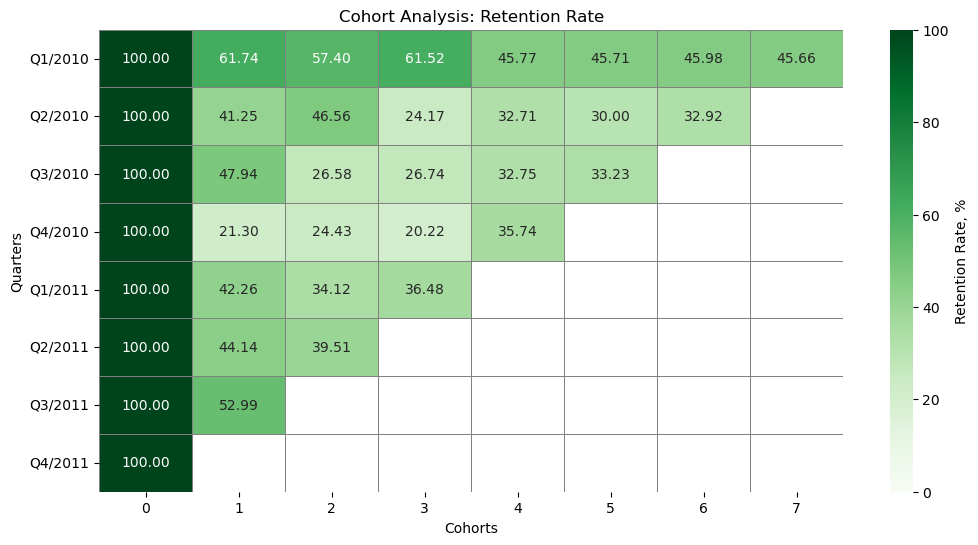

In [42]:

import seaborn as sns

# 2010-01-01 이후 데이터만 사용 
# 2009년 12월 데이터는 2010년 데이터가 아니고 
# 12월만 가지고 2009/Q4의 전체적인 추세를 판단하기에는 무리가 있어 분기별 분석 파트에서는 고려대상에서 제외하였음
df1 = df[df['InvoiceDate'] >= '2010-01-01'].copy()

# 분기 컬럼  
df1['Quarter'] = df1['InvoiceDate'].dt.to_period('Q')

# Cohort & Retention 계산 
df1['CohortQuarter'] = df1.groupby('Customer ID')['Quarter'].transform('min')
df1['CohortIndex']   = (
    df1['Quarter'].view('int64') - df1['CohortQuarter'].view('int64')
)

cohort_sizes = (
    df1.groupby(['CohortQuarter', 'CohortIndex'])['Customer ID']
      .nunique()
      .unstack()                 
)

retention = cohort_sizes.divide(cohort_sizes[0], axis=0) * 100
retention = retention.round(2)

retention.index = retention.index.map(lambda p: f"Q{p.quarter}/{p.year}")

# Heatmap 
plt.figure(figsize=(12, 6))
sns.heatmap(
    retention,
    annot=True, fmt='.2f',
    cmap='Greens', vmin=0, vmax=100,
    linewidths=.5, linecolor='gray',
    cbar_kws={'label': 'Retention Rate, %'},
    mask=retention.isna()    # 데이터 없는 칸은 흰색
)
plt.title('Cohort Analysis: Retention Rate')
plt.xlabel('Cohorts')
plt.ylabel('Quarters')
plt.show()






### **문제 7: Retention: 코호트 분석(평균 구매수량)**

- 분기단위의 활성 사용자의 평균 구매수량을 분석하세요
    - 구매수량이기 때문에 0 index의 값이 100% 가 아닌 절대 값임을 주의

C:\Users\USER\AppData\Local\Temp\ipykernel_13764\3841663704.py:12: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df1['Quarter'].view('int64') - df1['CohortQuarter'].view('int64')
C:\Users\USER\AppData\Local\Temp\ipykernel_13764\3841663704.py:12: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df1['Quarter'].view('int64') - df1['CohortQuarter'].view('int64')


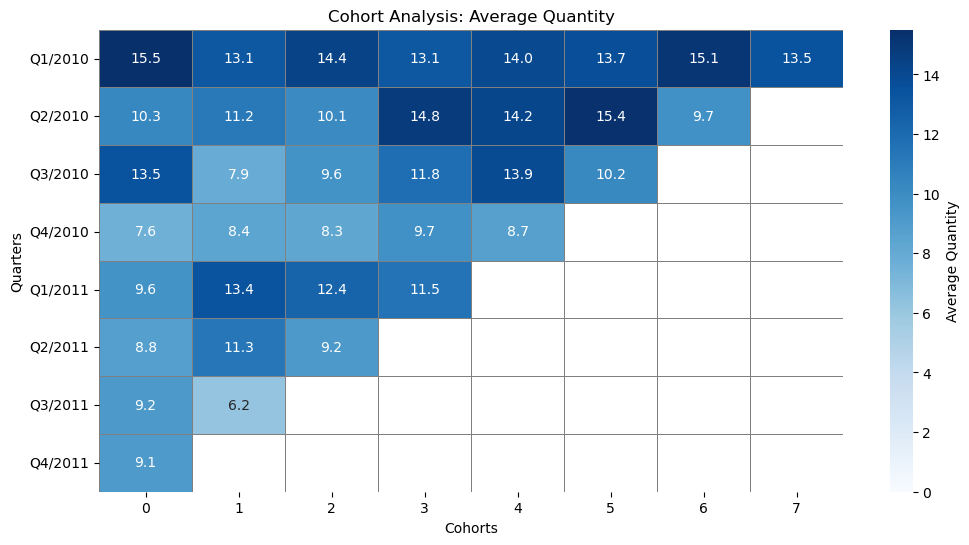

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 분기 컬럼(캘린더 기준 Q) 
df1['Quarter'] = df1['InvoiceDate'].dt.to_period('Q')

# CohortQuarter / CohortIndex 계산 
df1['CohortQuarter'] = df1.groupby('Customer ID')['Quarter'].transform('min')
df1['CohortIndex']   = (
    df1['Quarter'].view('int64') - df1['CohortQuarter'].view('int64')
)

# (CohortQuarter, CohortIndex)별 **평균 구매수량** 집계 ─
average_quantity = (
    df1.groupby(['CohortQuarter', 'CohortIndex'])['Quantity']   # ‘Quantity’ 칼럼
      .mean()
      .unstack()               
      .round(1)
)

# 보기 좋은 행 레이블(Q1/2010 형태) 
average_quantity.index = average_quantity.index.map(
    lambda p: f"Q{p.quarter}/{p.year}"
)

# 히트맵 
plt.figure(figsize=(12, 6))
sns.heatmap(
    data=average_quantity,
    annot=True, fmt='.1f',
    cmap='Blues',
    cbar_kws={'label': 'Average Quantity'},
    linewidths=0.5, linecolor='gray',
    vmin=0,
    mask=average_quantity.isna()   # 값이 없는 칸은 흰색
)
plt.title('Cohort Analysis: Average Quantity')
plt.xlabel('Cohorts')
plt.ylabel('Quarters')
plt.show()



### **문제 8: Revenue : ARPU**

- 각 고객의 월별 **구매 금액**을 집계하고, 이를 기반으로 **ARPU**를 분석하세요.

C:\Users\USER\AppData\Local\Temp\ipykernel_13764\3659679038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')   # 예: 2009-12 · 2010-01 …


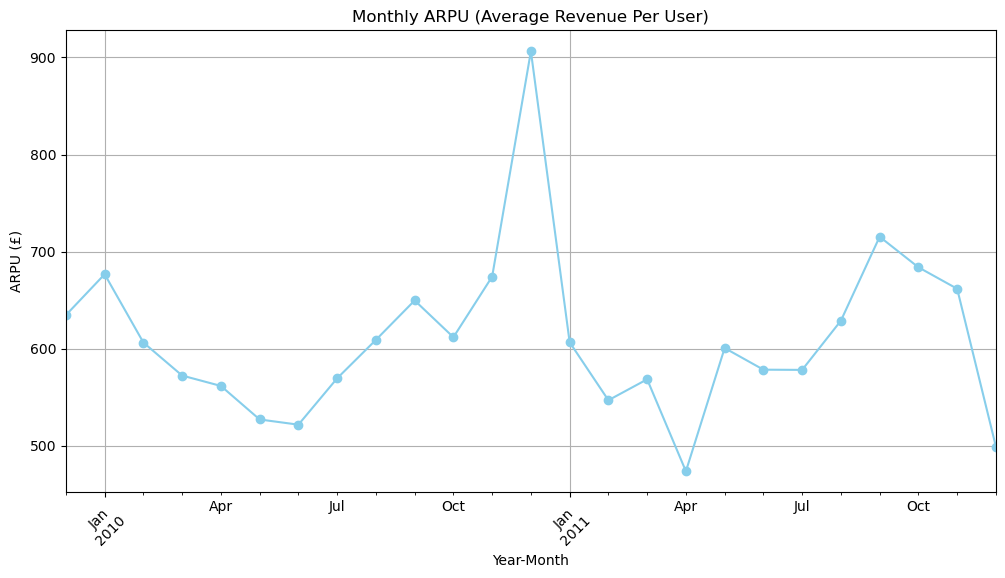

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Year-Month 컬럼
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')   # 예: 2009-12 · 2010-01 …

# 월-고객별 총매출
monthly_cust_rev = (
    df.groupby(['YearMonth', 'Customer ID'])['Total']    # ‘Total’ = 결제금액
      .sum()
)

# ARPU 계산 
arpu = monthly_cust_rev.groupby('YearMonth').mean().round(2)

# 시각화
plt.figure(figsize=(12, 6))
arpu.plot(kind='line', marker='o', color='skyblue')
plt.title("Monthly ARPU (Average Revenue Per User)")
plt.xlabel("Year-Month")
plt.ylabel("ARPU (£)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




### **문제 9: Revenue(CLV)**

- 고객 생애 가치를 예측하기 위해 **CLV**를 계산하고 표로 CLV기준으로 내림차순으로 정렬해보세요
- **CLV 식: 평균금액 x  평균 구매 빈도 x 고객유지기간**(단, Invoce Date의 최대 최소를 빼준 뒤 1을 더해주기)

In [45]:
cust_agg = (
    df.groupby('Customer ID')
      .agg(
          total_revenue=('Total', 'sum'),
          purchase_cnt =('InvoiceNo', 'nunique'),
          first_dt     =('InvoiceDate', 'min'),
          last_dt      =('InvoiceDate', 'max')
      )
)

# 유지기간(월 단위위) 계산
def diff_in_months(row):
    y1, m1 = row['first_dt'].year, row['first_dt'].month
    y2, m2 = row['last_dt'].year,  row['last_dt'].month
    return (y2 - y1) * 12 + (m2 - m1) + 1     # +1 규칙 반영

cust_agg['lifetime_months'] = cust_agg.apply(diff_in_months, axis=1)

# 평균 금액 · 평균 구매 빈도
cust_agg['avg_amount']   = cust_agg['total_revenue'] / cust_agg['purchase_cnt']
cust_agg['avg_frequency'] = cust_agg['purchase_cnt']          


# CLV 계산 (avg_amount × avg_frequency × lifetime)

cust_agg['CLV'] = (
    cust_agg['avg_amount'] *
    cust_agg['avg_frequency'] *
    cust_agg['lifetime_months']
).round(2)


# 3) CLV 내림차순 정렬 
clv_table = (
    cust_agg
      .sort_values('CLV', ascending=False)
      [ ['total_revenue', 'purchase_cnt', 'lifetime_months', 'CLV'] ]
      .reset_index()
)

clv_table


,Customer ID,total_revenue,purchase_cnt,lifetime_months,CLV
0,18102,598215.22,153,25,14955380.50
1,14646,523342.07,164,25,13083551.75
2,14156,296564.69,202,24,7117552.56
3,14911,270248.53,510,25,6756213.25
4,13694,190825.52,164,25,4770638.00
...,...,...,...,...,...
5937,15849,-5876.34,1,1,-5876.34
5938,12918,-10953.50,3,1,-10953.50
5939,17399,-25111.09,1,1,-25111.09
5940,15413,-2531.38,7,11,-27845.18


### **문제10**

- 어떤 회사의 고객 대기시간은 5분에서 15분 사이의 균등분포를 따릅니다. 고객 100명이 대기한 시간을 시뮬레이션하고, 평균 대기시간과 표준편차를 계산하세요.

In [46]:
import numpy as np

# 시뮬레이션
from scipy.stats import uniform

user_count = 100
waiting_times = uniform.rvs(loc=5, scale=10, size=user_count, random_state=0)

# 평균과 표준편차 계산
mean_waiting_time = np.mean(waiting_times)
std_waiting_time = np.std(waiting_times, ddof=1)

print(f"평균 대기시간: {mean_waiting_time:.2f}")
print(f"표준편차: {std_waiting_time:.2f}")

평균 대기시간: 9.73
표준편차: 2.90


### **문제11**

- 한 신제품의 초기 성공 확률이 0.3이라고 가정합니다. 10회의 시뮬레이션에서 성공한 횟수를 구하고, 각 성공 여부를 출력하세요.

In [47]:
import numpy as np
from scipy.stats import bernoulli

# 성공 확률
p = 0.3

# 시뮬레이션
np.random.seed(0)
results = bernoulli.rvs(p, size=10)

# 성공 횟수
success_count = np.sum(results)

# 출력
print("각 성공 여부:", results)
print(f"성공한 총 횟수: {success_count}")


각 성공 여부: [0 1 0 0 0 0 0 1 1 0]
성공한 총 횟수: 3


### **문제12**

- 한 수업에서 학생 20명이 5문제로 구성된 퀴즈를 치릅니다. 각 문제의 정답 확률은 0.7이라고 가정할 때, 각 학생이 맞힌 점수를 시뮬레이션하고, 전체 학생의 평균 점수를 계산하세요.

In [48]:
import numpy as np
from scipy.stats import binom

# 시뮬레이션
np.random.seed(0)
scores = binom.rvs(n=5, p=0.7, size=20)

# 평균 점수 계산
average_score = np.mean(scores)

print(f"학생별 점수: {scores}")
print(f"평균 점수: {average_score:.2f}")


학생별 점수: [3 3 3 3 4 3 4 2 2 4 3 3 3 2 5 5 5 3 3 2]
평균 점수: 3.25


### 문제13

- 한 공장에서 생산되는 제품의 무게는 평균 50g, 표준편차 5g의 정규분포를 따릅니다.1000개의 제품 무게를 시뮬레이션하고, 무게가 45g 이상 55g 이하인 제품의 비율을 계산(변수명: `within_range`)하세요. 무게 분포의 히스토그램을 그리세요.

45g 이상 55g 이하 비율: 69.90%


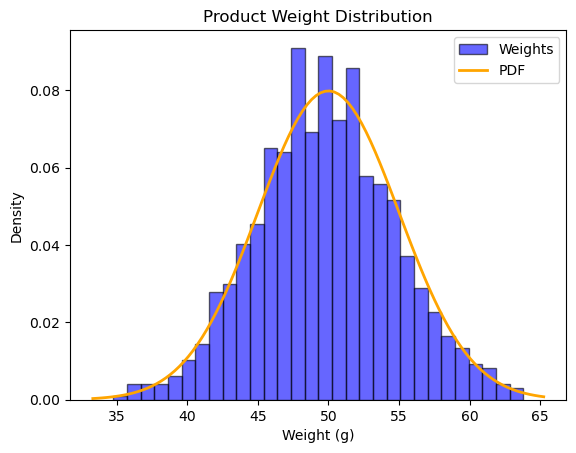

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1000개 제품 무게 시뮬레이션
np.random.seed(0) # seed number 설정으로 결과 재현할 수 있게 함
weights = np.random.normal(loc=50, scale=5, size=1000)

# 45g 이상 55g 이하 비율 계산
within_range = np.mean((weights >= 45) & (weights <= 55))
print(f"45g 이상 55g 이하 비율: {within_range:.2%}")

# 히스토그램 (밀도 = True, label = Weights)
count, bins, ignored = plt.hist(weights, bins=30, density=True, alpha=0.6, color='b', label='Weights', edgecolor='black')

# 정규분포 PDF 곡선 추가

xmin, xmax = plt.xlim() # 현재 x축 범위를 갖고 옴 (최솟값, 최댓값)
                        # 불필요한 범위 표시 방지

x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, loc=50, scale=5)
plt.plot(x, p, 'orange', linewidth=2, label='PDF') # 이름: PDF

# 그래프 설정
plt.title('Product Weight Distribution')
plt.xlabel('Weight (g)')
plt.ylabel('Density')
plt.legend(loc = 'best') # best 위치에 범례 표시
plt.show()


